In [52]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import string
import re 

In [53]:
import os
#setting working directory
os.chdir("C:/Users/saini/Downloads")

# Data load & Preprocessing

Data https://drive.google.com/open?id=1_1yMSh-oswCwQbim_trNmCo6HqJ4jLWo

In [54]:
data=pd.read_csv("bbc-text.csv") 

In [55]:
data.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [56]:
data.dtypes

category    object
text        object
dtype: object

In [57]:
data.nunique()

category       5
text        2126
dtype: int64

In [58]:
#checking null values in the data
print(data.isnull().sum())

category    0
text        0
dtype: int64


In [59]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

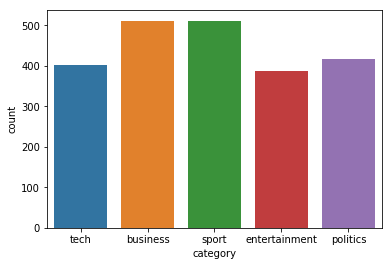

In [60]:
sns.countplot(data['category'])
# The distribution is almost equal

In [61]:
len(data)

2225

## Tokenisation

In [62]:
for i in range(len(data)):
    data.iloc[i,1]= word_tokenize(data.iloc[i,1])

In [63]:
data.iloc[0,1]

['tv',
 'future',
 'in',
 'the',
 'hands',
 'of',
 'viewers',
 'with',
 'home',
 'theatre',
 'systems',
 'plasma',
 'high-definition',
 'tvs',
 'and',
 'digital',
 'video',
 'recorders',
 'moving',
 'into',
 'the',
 'living',
 'room',
 'the',
 'way',
 'people',
 'watch',
 'tv',
 'will',
 'be',
 'radically',
 'different',
 'in',
 'five',
 'years',
 'time',
 '.',
 'that',
 'is',
 'according',
 'to',
 'an',
 'expert',
 'panel',
 'which',
 'gathered',
 'at',
 'the',
 'annual',
 'consumer',
 'electronics',
 'show',
 'in',
 'las',
 'vegas',
 'to',
 'discuss',
 'how',
 'these',
 'new',
 'technologies',
 'will',
 'impact',
 'one',
 'of',
 'our',
 'favourite',
 'pastimes',
 '.',
 'with',
 'the',
 'us',
 'leading',
 'the',
 'trend',
 'programmes',
 'and',
 'other',
 'content',
 'will',
 'be',
 'delivered',
 'to',
 'viewers',
 'via',
 'home',
 'networks',
 'through',
 'cable',
 'satellite',
 'telecoms',
 'companies',
 'and',
 'broadband',
 'service',
 'providers',
 'to',
 'front',
 'rooms',
 'and

In [64]:
len(data.iloc[0,1])

773

## Cleaning

In [65]:
#Removing punctuations
for i in range(len(data)):
    data.iloc[i,1] = [t for t in data.iloc[i,1] if t not in string.punctuation]

In [66]:
#removing numbers
def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list
  

In [67]:
for i in range(len(data)):
    data.iloc[i,1]= remove(data.iloc[i,1])

In [68]:
len(data.iloc[0,1])

736

In [69]:
#removing stopwords
import nltk
#nltk.download('stopwords')

nltk_stop_words = nltk.corpus.stopwords.words('english')

In [70]:
for i in range(len(data)):
    data.iloc[i,1] = [t for t in data.iloc[i,1] if t not in nltk_stop_words]

In [71]:
len(data.iloc[0,1])

410

## Lematization

In [72]:

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
lemmatize_words = np.vectorize(wordnet_lemmatizer.lemmatize)


for i in range(len(data)):
    data.iloc[i,1]= lemmatize_words(data.iloc[i,1])


In [73]:
data

,category,text
0,tech,"[tv, future, hand, viewer, home, theatre, syst..."
1,business,"[worldcom, bos, left, book, alone, former, wor..."
2,sport,"[tiger, wary, farrell, gamble, leicester, say,..."
3,sport,"[yeading, face, newcastle, fa, cup, premiershi..."
4,entertainment,"[ocean, twelve, raid, box, office, ocean, twel..."
5,politics,"[howard, hit, back, mongrel, jibe, michael, ho..."
6,politics,"[blair, prepares, name, poll, date, tony, blai..."
7,sport,"[henman, hope, ended, dubai, third, seed, tim,..."
8,sport,"[wilkinson, fit, face, edinburgh, england, cap..."
9,entertainment,"[last, star, war, child, sixth, final, star, w..."


In [80]:
data2=data.copy()

## Machine Learning modeling 

In [83]:
#de-tokenisation
from nltk.tokenize.treebank import TreebankWordDetokenizer
for i in range(len(data2)):
    data2.iloc[i,1]= TreebankWordDetokenizer().detokenize(data2.iloc[i,1])

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(data2.text).toarray()
labels = data2.category
features.shape

(2225, 24939)

In [85]:
#Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data2['text'], data2['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [86]:
print(clf.predict(count_vect.transform(["Indian hotel chain Oyo has now locked horns with hotel operators, who claim that the company is hurting ,"])))

['business']


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

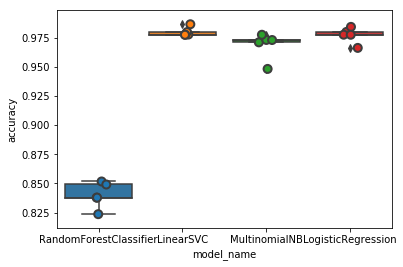

In [87]:
### Model Selection ###
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [88]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.979779
LogisticRegression        0.977073
MultinomialNB             0.968533
RandomForestClassifier    0.840024
Name: accuracy, dtype: float64

## CNN for Text Classification

In [89]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import random
from collections import Counter, OrderedDict
import re
from copy import deepcopy
flatten = lambda l: [item for sublist in l for item in sublist]
random.seed(1024)

In [90]:
USE_CUDA = torch.cuda.is_available()
gpus = [0]
torch.cuda.set_device(gpus[0])

FloatTensor = torch.cuda.FloatTensor if USE_CUDA else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if USE_CUDA else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if USE_CUDA else torch.ByteTensor

In [91]:
def getBatch(batch_size, train_data):
    random.shuffle(train_data)
    sindex = 0
    eindex = batch_size
    while eindex < len(train_data):
        batch = train_data[sindex: eindex]
        temp = eindex
        eindex = eindex + batch_size
        sindex = temp
        yield batch
    
    if eindex >= len(train_data):
        batch = train_data[sindex:]
        yield batch

In [92]:
def pad_to_batch(batch):
    x,y = zip(*batch)
    max_x = max([s.size(1) for s in x])
    x_p = []
    for i in range(len(batch)):
        if x[i].size(1) < max_x:
            x_p.append(torch.cat([x[i], Variable(LongTensor([word2index['<PAD>']] * (max_x - x[i].size(1)))).view(1, -1)], 1))
        else:
            x_p.append(x[i])
    return torch.cat(x_p), torch.cat(y).view(-1)

In [93]:
def prepare_sequence(seq, to_index):
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<UNK>"], seq))
    return Variable(LongTensor(idxs))

In [94]:
# Preprocessing

X=data['text']
y=data['category']

In [95]:
# Build Vocab

vocab = list(set(flatten(X)))

In [97]:
vocab

['',
 'fabien',
 'a-team',
 'measure',
 'uca',
 'lederhosen',
 'runcorn',
 'nozaki',
 'treatment',
 'wear',
 'zoellick',
 'fought',
 'callow',
 'bogota',
 'auckland',
 'connick',
 'hiss-free',
 'psa',
 'towards',
 'peak',
 'plethora',
 'moscow',
 'unwell',
 'semi-fictional',
 'platon',
 'fair-minded',
 'stockmarket',
 'anti-hunting',
 'pile-up',
 'one-quarter',
 'alistair',
 'embarrass',
 'pay-tv',
 'backpack',
 'filed',
 'scaling',
 'zvonareva',
 'flanimals',
 'kinki',
 'fiji',
 'chester',
 'upright',
 'people',
 'subject',
 'brightly',
 'ideologically',
 'sebadoh',
 'broadcasting',
 'cunningly',
 'shapiro',
 'otherwise',
 'playback',
 'revolt',
 'ahern',
 'faroe',
 'network',
 'morale-boosting',
 'algerian',
 'contepomi',
 'benjamin',
 'worn',
 'companion',
 'divide',
 'yore',
 'recalling',
 'proactive',
 'rousing',
 'paving',
 'recreated',
 'fixate',
 'stephenson',
 'earthlink',
 'operated',
 'capriati',
 'clash',
 'massively',
 'fraternity',
 'skillset',
 'mandolin',
 'ronnies',
 '

In [98]:
len(vocab)

27530

In [99]:
len(set(y))

5

In [100]:
word2index={'<PAD>': 0, '<UNK>': 1}

for vo in vocab:
    if word2index.get(vo) is None:
        word2index[vo] = len(word2index)
        
index2word = {v:k for k, v in word2index.items()}

target2index = {}

for cl in set(y):
    if target2index.get(cl) is None:
        target2index[cl] = len(target2index)

index2target = {v:k for k, v in target2index.items()}

In [101]:
X_p, y_p = [], []
for pair in zip(X,y):
    X_p.append(prepare_sequence(pair[0], word2index).view(1, -1))
    y_p.append(Variable(LongTensor([target2index[pair[1]]])).view(1, -1))
    
data_p = list(zip(X_p, y_p))
random.shuffle(data_p)

train_data = data_p[: int(len(data_p) * 0.9)]
test_data = data_p[int(len(data_p) * 0.9):]

## Load Pretrained word vector

https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

In [102]:
import gensim

C:\Users\saini\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [103]:
model = gensim.models.KeyedVectors.load_word2vec_format('../Downloads/GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\saini\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [104]:
len(model.index2word)

3000000

In [105]:
pretrained = []

for key in word2index.keys():
    try:
        pretrained.append(model[word2index[key]])
    except:
        pretrained.append(np.random.randn(300))
        
pretrained_vectors = np.vstack(pretrained)

## Modeling

In [106]:
class  CNNClassifier(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, output_size, kernel_dim=100, kernel_sizes=(3, 4, 5), dropout=0.5):
        super(CNNClassifier,self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(1, kernel_dim, (K, embedding_dim)) for K in kernel_sizes])

        # kernal_size = (K,D) 
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(kernel_sizes) * kernel_dim, output_size)
    
    
    def init_weights(self, pretrained_word_vectors, is_static=False):
        self.embedding.weight = nn.Parameter(torch.from_numpy(pretrained_word_vectors).float())
        if is_static:
            self.embedding.weight.requires_grad = False


    def forward(self, inputs, is_training=False):
        inputs = self.embedding(inputs).unsqueeze(1) # (B,1,T,D)
        inputs = [F.relu(conv(inputs)).squeeze(3) for conv in self.convs] #[(N,Co,W), ...]*len(Ks)
        inputs = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in inputs] #[(N,Co), ...]*len(Ks)

        concated = torch.cat(inputs, 1)

        if is_training:
            concated = self.dropout(concated) # (N,len(Ks)*Co)
        out = self.fc(concated) 
        return F.log_softmax(out,1)

In [107]:
##Train

EPOCH = 5
BATCH_SIZE = 50
KERNEL_SIZES = [3,4,5]
KERNEL_DIM = 100
LR = 0.001

In [108]:
model = CNNClassifier(len(word2index), 300, len(target2index), KERNEL_DIM, KERNEL_SIZES)
model.init_weights(pretrained_vectors) # initialize embedding matrix using pretrained vectors

if USE_CUDA:
    model = model.cuda()
    
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

In [110]:
for epoch in range(EPOCH):
    losses = []
    for i,batch in enumerate(getBatch(BATCH_SIZE, train_data)):
        inputs,targets = pad_to_batch(batch)
        
        model.zero_grad()
        preds = model(inputs, True)
        
        loss = loss_function(preds, targets)
        losses.append(loss.data.tolist())
        loss.backward()
        
        #for param in model.parameters():
         #   param.grad.data.clamp_(-3, 3)
        
        optimizer.step()
        
        if i % 100 == 0:
            print("[%d/%d] mean_loss : %0.2f" %(epoch, EPOCH, np.mean(losses)))
            losses = []

[0/5] mean_loss : 2.07
[1/5] mean_loss : 0.53
[2/5] mean_loss : 0.39
[3/5] mean_loss : 0.20
[4/5] mean_loss : 0.08


In [111]:
accuracy = 0

In [112]:
for test in test_data:
    pred = model(test[0]).max(1)[1]
    pred = pred.data.tolist()[0]
    target = test[1].data.tolist()[0][0]
    if pred == target:
        accuracy += 1

print(accuracy/len(test_data) * 100)

93.27354260089686
